In [14]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline
PI2 = np.pi * 2

import soundcard as sc
import IPython.display as ipd

from constants import *

# get a list of all speakers:
speakers = sc.all_speakers()
# get the current default speaker on your system:
default_speaker = sc.default_speaker()
# get a list of all microphones:
mics = sc.all_microphones()
# get the current default microphone on your system:
default_mic = sc.default_microphone()

from guitar_tuner import make_spectrum

def freq2key(freq):
    frequencies = np.array(list(KEY_FREQUENCY_MAP_PIANO.values()))
    return FREQUENCY_KEY_MAP_PIANO[
        frequencies[
            np.argmin(
                np.abs(frequencies - freq)
                )
            ]
        ]

In [2]:
with open('key_freq_mapping') as f:
    lines = f.read().splitlines()
kf_map = { float(l.split()[1]):l.split()[0] for l in lines}

KEYS = list(kf_map.values())
FREQS = np.array(list(kf_map.keys()))

## Compare octaves
### b3

No handles with labels found to put in legend.


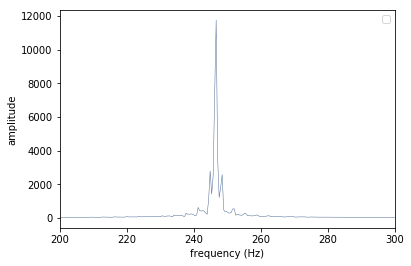

In [19]:
b3_wave = thinkdsp.read_wave('data/b3.wav')
display(b3_wave.make_audio())

spectrum = b3_wave.make_spectrum()
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[200, 300])

# b4

No handles with labels found to put in legend.


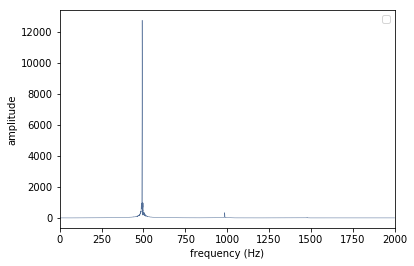

In [7]:
b4_wave = thinkdsp.read_wave('data/b4.wav')
display(b4_wave.make_audio())

spectrum = b4_wave.make_spectrum()
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 2000])

# b2

No handles with labels found to put in legend.


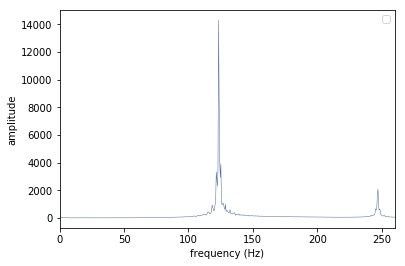

In [18]:
b2_wave = thinkdsp.read_wave('data/b2.wav')
display(b2_wave.make_audio())

spectrum = b2_wave.make_spectrum()
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 260])

# Analyze interactively

No handles with labels found to put in legend.


b3 247.0


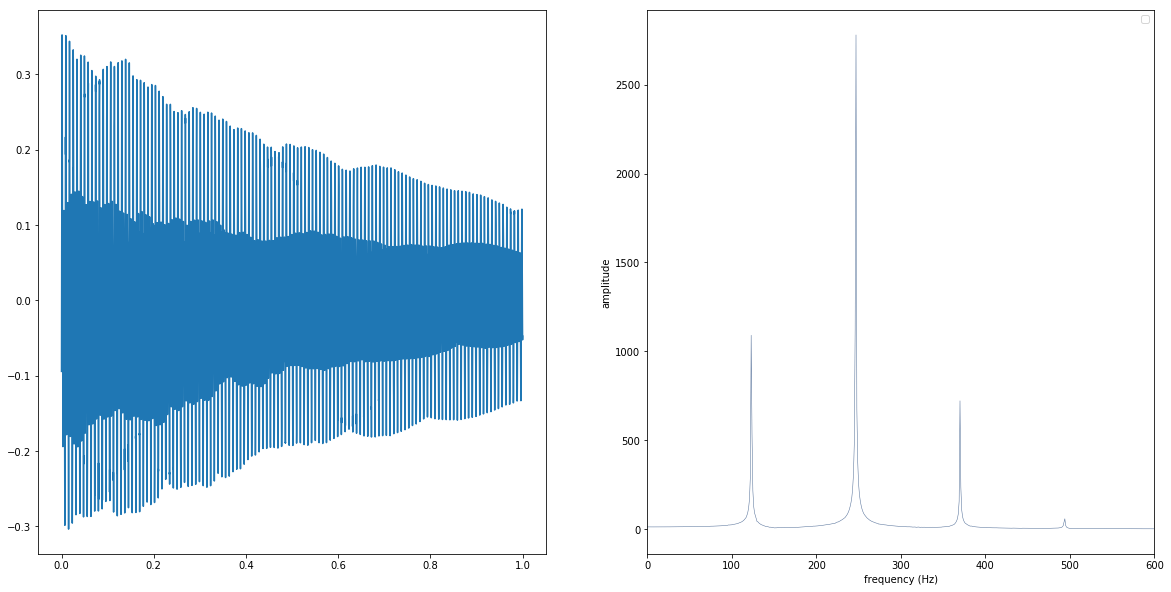

In [21]:
ys = default_mic.record(samplerate=44100, numframes=44100*2, channels=1)
ys = ys[44100:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)

No handles with labels found to put in legend.


b3 247.0


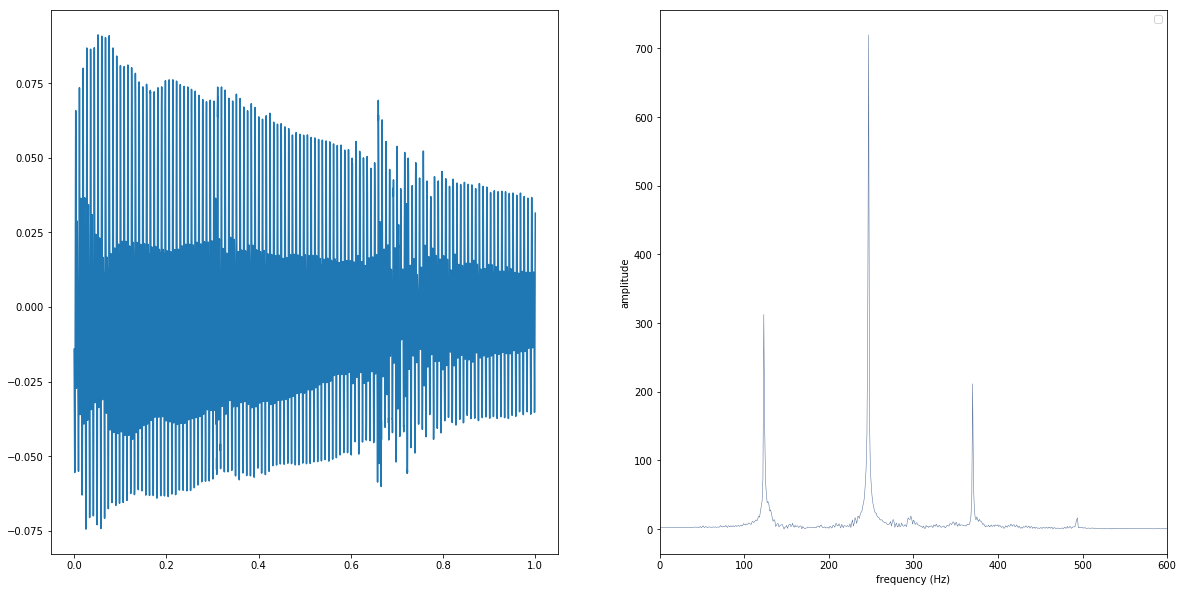

In [22]:
ys = default_mic.record(samplerate=44100, numframes=44100*2, channels=1)
ys = ys[44100:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)